## EDA for Springboard capstone project 1 ##
- Can you count something interesting?
- Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can you make a bar plot or a histogram?
- Can you compare two related quantities?
- Can you make a scatterplot?
- Can you make a time-series plot?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

The data set, ‘Diabetes 130-US hospitals for years 1999-2008 Data Set’ is an open dataset that is obtainable at the UCI Machine Learning repository: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#

In [2]:
# import the data dictionary for reference generated in the cleaning/wrangling Notebook
data_dictionary = pd.read_csv('data_dictionary.csv', index_col = 0)
pd.set_option('display.max_colwidth', -1)
data_dictionary

,Description and values,Feature name,Type
0,Unique identifier of an encounter,Encounter ID,Numeric
1,Unique identifier of a patient,Patient number,Numeric
2,"Values: Caucasian, Asian, African American, Hispanic, and other",Race,Nominal
3,"Values: male, female, and unknown/invalid",Gender,Nominal
4,"Grouped in 10-year intervals: 0, 10), 10, 20), â€¦, 90, 100)",Age,Nominal
5,Weight in pounds.,Weight,Numeric
6,"Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available",Admission type,Nominal
7,"Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available",Discharge disposition,Nominal
8,"Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital",Admission source,Nominal
9,Integer number of days between admission and discharge,Time in hospital,Numeric


In [3]:
# import the DataFrame from the cleaning/wrangling Notebook
df = pd.read_csv('df1.csv', index_col = 0)
pd.set_option('display.max_columns', 500)
df.sample(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit_bin,readmit_tri
72834,214053936,84835944,Caucasian,Female,[70-80),1,1,7,3,MC,?,37,0,17,0,1,2,466,426,162,9,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30,0,2
25109,84327198,23378598,Caucasian,Male,[60-70),2,1,17,2,MC,?,24,0,9,3,0,0,157,560,276,9,>300,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,0,2
62928,175114614,89087427,Caucasian,Female,[80-90),1,3,7,1,?,?,49,0,15,0,0,0,191,414,V45,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,<30,1,1
3604,22037016,8812899,Caucasian,Female,[70-80),1,6,7,14,?,?,54,2,20,0,0,0,428,250.41,585,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30,0,2
24018,81719202,98414694,Caucasian,Male,[80-90),1,1,7,1,?,?,45,0,5,2,0,0,434,396,428,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30,0,2


## Race ##

Text(0,0.5,'# of encounters')

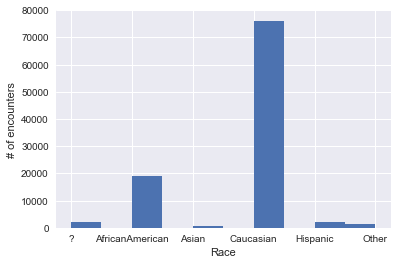

In [4]:
# The most common race is Caucasian, followed by African American.
sns.set()
plt.hist(df.race);
plt.xlabel ('Race')
plt.ylabel('# of encounters')

race
?                  8.271007 
AfricanAmerican    11.218116
Asian              10.140406
Caucasian          11.290556
Hispanic           10.407462
Other              9.628154 
Name: readmit_bin, dtype: float64


Text(0,0.5,'% readmitted')

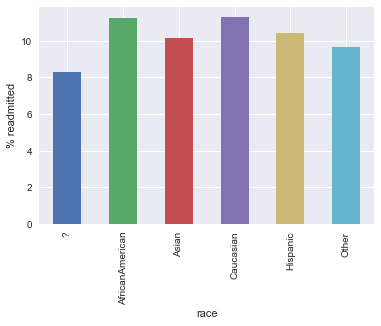

In [5]:
# Plot race vs readmission.  Race does not appear to be correlated with readmittance rate
percent_readmit_by_race = df.groupby('race')['readmit_bin'].sum()/df.groupby('race')['readmit_bin'].count() * 100
print(percent_readmit_by_race)
percent_readmit_by_race.plot.bar(); plt.ylabel('% readmitted')

# Age #

[70-80)    26068
[60-70)    22483
[50-60)    17256
[80-90)    17197
[40-50)    9685 
Name: age, dtype: int64

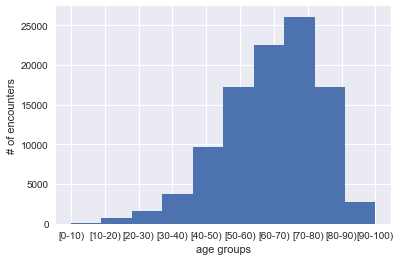

In [6]:
# What is the distribution of ages?
# Age is distributed more towards older patients as would be expected among those admitted to a hospital with a pre-existing
# condition of diabetes.
plt.hist(df.age);
plt.xlabel('age groups')
plt.ylabel("# of encounters")
df.age.value_counts()[:5]

age
[0-10)      1.863354 
[10-20)     5.788712 
[20-30)     14.242607
[30-40)     11.231788
[40-50)     10.604027
[50-60)     9.666203 
[60-70)     11.128408
[70-80)     11.773055
[80-90)     12.083503
[90-100)    11.099177
Name: readmit_bin, dtype: float64


Text(0,0.5,'% readmitted')

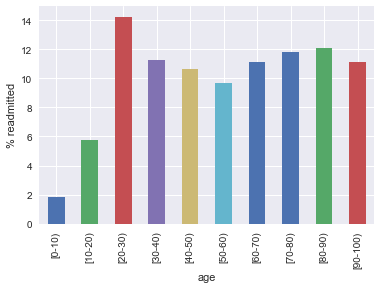

In [7]:
# Is age category related to readmission rate?  There is some variation.  Intersting that 20-30 year olds have 
# elevated % readmitted.  But there are far few in total numbers so might not be significant.
percent_readmit_by_age = df.groupby('age')['readmit_bin'].sum()/df.groupby('age')['readmit_bin'].count() * 100
print(percent_readmit_by_age)
percent_readmit_by_age.plot.bar(); plt.ylabel('% readmitted')

# Admission Type #

In [8]:
# Table of description of admission type id's (from IDs_mapping.csv)
admin_type = [1,2,3,4,5,6,7,8]
description = ['Emergency','Urgent','Elective','Newborn','Not Available','null','Trauma Center','Not Mapped']
number = df.admission_type_id.value_counts(sort = False).tolist()
admin_df = pd.DataFrame({'admission type': admin_type, 'description': description, '# of admissions':number})
admin_df

,# of admissions,admission type,description
0,53990,1,Emergency
1,18480,2,Urgent
2,18869,3,Elective
3,10,4,Newborn
4,4785,5,Not Available
5,5291,6,null
6,21,7,Trauma Center
7,320,8,Not Mapped


Text(0,0.5,'# of Admissions')

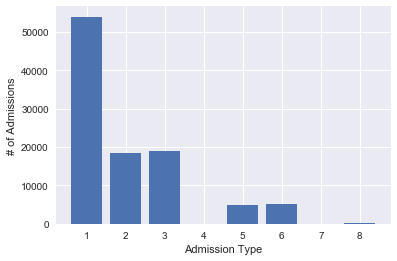

In [9]:
# Visualization of # of Admissions per admission type
plt.bar(admin_df['admission type'], admin_df['# of admissions'])
plt.xlabel('Admission Type')
plt.ylabel('# of Admissions')

admission_type_id
1    11.522504
2    11.179654
3    10.392708
4    10.000000
5    10.344828
6    11.075411
7    0.000000 
8    8.437500 
Name: readmit_bin, dtype: float64


Text(0,0.5,'% readmitted')

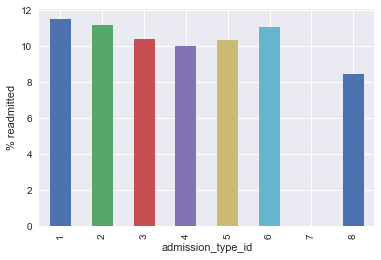

In [10]:
# Is the admission type category related to readmission rate?  
percent_readmit_by_admintype = df.groupby('admission_type_id')['readmit_bin'].sum()/df.groupby('admission_type_id')['readmit_bin'].count() * 100
print(percent_readmit_by_admintype)
percent_readmit_by_admintype.plot.bar(); plt.ylabel('% readmitted')

In [11]:
# TODO: Group the admission type - not available, null, and not mapped can be one category.
# Try grouping 5,6, and 8 (all in the missing or not available category) and see if this relationship changes.


In [12]:
# TODO: Group the admission type - not available, null, and not mapped can be one category.  See if there is a relationship
# TODO: Group the diagnosis codes into similar categories - like heart/circulatory, pulmonary

# Discharge Disposition ID #

In [13]:
#Description is from the id_mappings.csv file provided with the original data set.
discharge_type = [i+1 for i in range(30)]
description = ['Discharged to home','Discharged/transferred to another short term hospital','Discharged/transferred to SNF',
              'Discharged/transferred to ICF','Discharged/transferred to another type of inpatient care institution',
              'Discharged/transferred to home with home health service','Left AMA',
              'Discharged/transferred to home under care of Home IV provider','Admitted as an inpatient to this hospital',
              'Neonate discharged to another hospital for neonatal aftercare','Expired',
               'Still patient or expected to return for outpatient services','Hospice / home','Hospice / medical facility',
               'Discharged/transferred within this institution to Medicare approved swing bed',
               'Discharged/transferred/referred another institution for outpatient services',
               'Discharged/transferred/referred to this institution for outpatient services','NULL',
               'Expired at home. Medicaid only, hospice.','Expired in a medical facility. Medicaid only, hospice.',
               'Expired, place unknown. Medicaid only, hospice.',
               'Discharged/transferred to another rehab fac including rehab units of a hospital .',
               'Discharged/transferred to a long term care hospital.',
               'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
               'Not Mapped','Unknown/Invalid',
               'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
               'Discharged/transferred to a federal health care facility.',
               'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
               'Discharged/transferred to a Critical Access Hospital (CAH).']


    
#number = df.discharge_disposition_id.value_counts(sort = False).tolist()
#discharge_df = pd.DataFrame({'discharge_type': discharge_type, 'description':description, '# of admissions':number})

#discharge_df = pd.DataFrame({'discharge type': discharge_type, 'description': description, '# of admissions':number})
#discharge_df
#df.discharge_disposition_id.value_counts(sort=False).index
d2 = {'Discharge Disposition ID':discharge_type, 'Description':description}
d2
disch_descr = pd.DataFrame(d2, columns=['Discharge Disposition ID','Description'])
disch_descr.set_index('Discharge Disposition ID').head()


,Description
Discharge Disposition ID,
1,Discharged to home
2,Discharged/transferred to another short term hospital
3,Discharged/transferred to SNF
4,Discharged/transferred to ICF
5,Discharged/transferred to another type of inpatient care institution


In [14]:
number = df.discharge_disposition_id.value_counts(sort = False).tolist()
index = df.discharge_disposition_id.value_counts(sort=False).index.tolist()
allnum = [i+1 for i in range(30)]
all_df = pd.DataFrame(allnum)

In [15]:
d = {'Unique Values':number, 'Discharge Disposition ID':index}
disch_df = pd.DataFrame(d,columns=['Discharge Disposition ID','Unique Values'])
disch_df.set_index('Discharge Disposition ID').head()

,Unique Values
Discharge Disposition ID,
1,60234
2,2128
3,13954
4,815
5,1184


In [16]:
df2 = pd.merge(disch_descr, disch_df, on = 'Discharge Disposition ID', how = 'left')
df2.set_index('Discharge Disposition ID').head()

,Description,Unique Values
Discharge Disposition ID,,
1,Discharged to home,60234.0
2,Discharged/transferred to another short term hospital,2128.0
3,Discharged/transferred to SNF,13954.0
4,Discharged/transferred to ICF,815.0
5,Discharged/transferred to another type of inpatient care institution,1184.0


Text(0,0.5,'# of encounters')

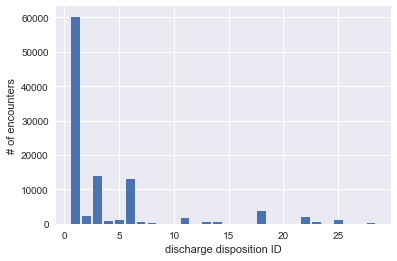

In [17]:
# Most of the discharge type is to home, then to SNF (probably skilled nursing facility - need to confirm), 
# then to home health facility.
plt.bar(df2['Discharge Disposition ID'],  df2['Unique Values'])
plt.xlabel('discharge disposition ID')
plt.ylabel('# of encounters')

1    60234
3    13954
6    12902
Name: discharge_disposition_id, dtype: int64


Text(0,0.5,'% readmitted')

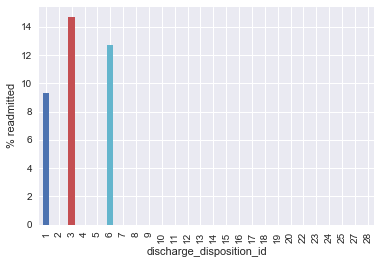

In [18]:
# Is there any kind of trend between readmission and the three most common discharge types?
top_dis = df[(df.discharge_disposition_id == 1) | (df.discharge_disposition_id == 3) | (df.discharge_disposition_id == 6) ]
#top_dis = df[pd.notnull(top_dis.discharge_disposition_id)]
print(top_dis.discharge_disposition_id.value_counts())
percent_readmit_by_discharge_type = top_dis.groupby('discharge_disposition_id')['readmit_bin'].sum()/df.groupby('discharge_disposition_id')['readmit_bin'].count() * 100

percent_readmit_by_discharge_type.plot.bar(); plt.ylabel('% readmitted')
# How do I show only types 1, 3, and 6?

In [19]:
# Being discharged to skilled nursing has higher readmit rate, then to home health facility, then lowest with home discharge.
# This makes sense!

# Numeric measures: Features 12-17 #
 I want to compare % readmittance with number of visits, procedures, lab tests.  Should be able to do this the same for each feature.

(array([46652., 20742.,     0., 12717.,     0.,  9443.,  4180.,     0.,
         3078.,  4954.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

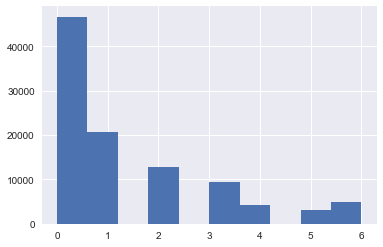

In [20]:
# How are number of procedures distributed?
plt.hist(df.num_procedures)

In [21]:
num_df = df.iloc[:,11:17]

In [22]:
num_df = pd.concat([num_df, df.readmit_bin], axis=1)

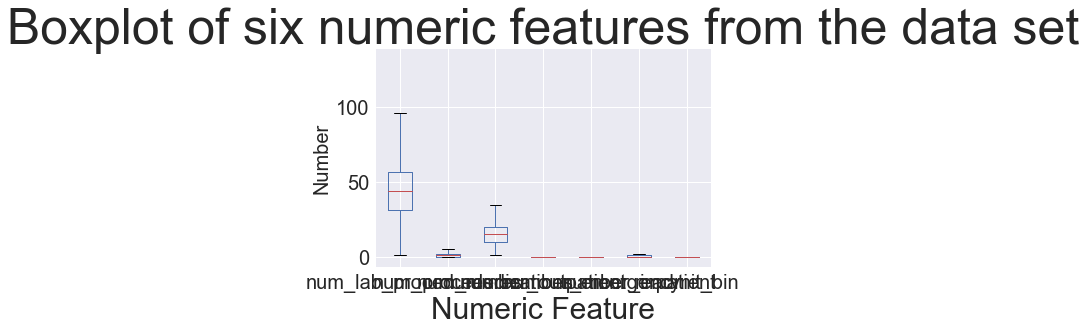

In [23]:
b = num_df.boxplot()
b.axes.set_title("Boxplot of six numeric features from the data set",fontsize=50)
b.set_xlabel("Numeric Feature",fontsize=30)
b.set_ylabel("Number",fontsize=20)
b.tick_params(labelsize=20)
plt.rcParams['figure.figsize'] = [30, 30]



Text(0.5,0,'# of visits')

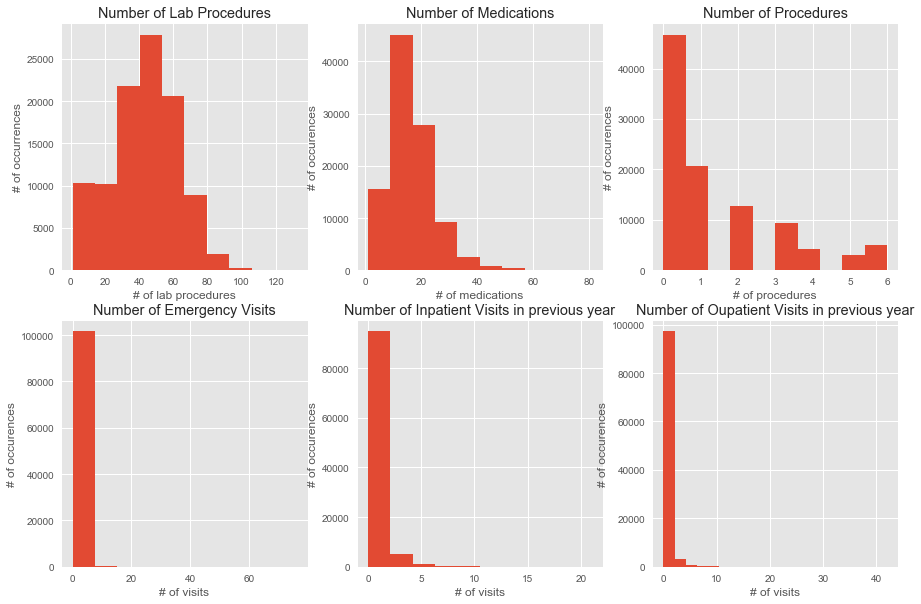

In [24]:
# Plot the histograms for each feature, giving unique titles, and axes labels for each
plt.rcParams['figure.figsize'] = [15,10]
plt.style.use('ggplot')
plt.subplot(2,3,1)
plt.hist(num_df['num_lab_procedures'])
plt.title('Number of Lab Procedures')
plt.ylabel('# of occurrences')
plt.xlabel('# of lab procedures')
plt.subplot(2,3,2)
plt.hist(num_df['num_medications'])
plt.title('Number of Medications')
plt.ylabel('# of occurences')
plt.xlabel('# of medications')
plt.subplot(2,3,3)
plt.hist(num_df['num_procedures'])
plt.title('Number of Procedures')
plt.ylabel('# of occurences')
plt.xlabel('# of procedures')
plt.subplot(2,3,4)
plt.hist(num_df['number_emergency'])
plt.title('Number of Emergency Visits')
plt.ylabel('# of occurences')
plt.xlabel('# of visits')
plt.subplot(2,3,5)
plt.hist(num_df['number_inpatient'])
plt.title('Number of Inpatient Visits in previous year')
plt.ylabel('# of occurences')
plt.xlabel('# of visits')
plt.subplot(2,3,6)
plt.hist(num_df['number_outpatient'], bins = 20)
plt.title('Number of Oupatient Visits in previous year')
plt.ylabel('# of occurences')
plt.xlabel('# of visits')

In [25]:
# Number of lab procedures, number of medications, and number of procedures have the most spread so will compare these to
# readmit rate
c = []
for i in ['num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']:
    
    print('------------------------------------------' +'\n')
    print(num_df.groupby('readmit_bin')[i].sum()/num_df.groupby('readmit_bin')[i].count() )
    c.append(num_df.groupby('readmit_bin')[i].sum()/num_df.groupby('readmit_bin')[i].count())         

------------------------------------------

readmit_bin
0    42.953644
1    44.226028
Name: num_lab_procedures, dtype: float64
------------------------------------------

readmit_bin
0    1.347123
1    1.280884
Name: num_procedures, dtype: float64
------------------------------------------

readmit_bin
0    15.911137
1    16.903143
Name: num_medications, dtype: float64
------------------------------------------

readmit_bin
0    0.360871
1    0.436911
Name: number_outpatient, dtype: float64
------------------------------------------

readmit_bin
0    0.177803
1    0.357313
Name: number_emergency, dtype: float64
------------------------------------------

readmit_bin
0    0.561648
1    1.224003
Name: number_inpatient, dtype: float64


In [26]:
# Question: How do I plot the above?
# Number of inpatient visits in the last year, number of outpatient visits in the last year, and number of emergency visits
# in the last year look like the most different in terms of readmitted vs not readmitted.
# This is plausible

Text(0.5,0,'# of diagnoses')

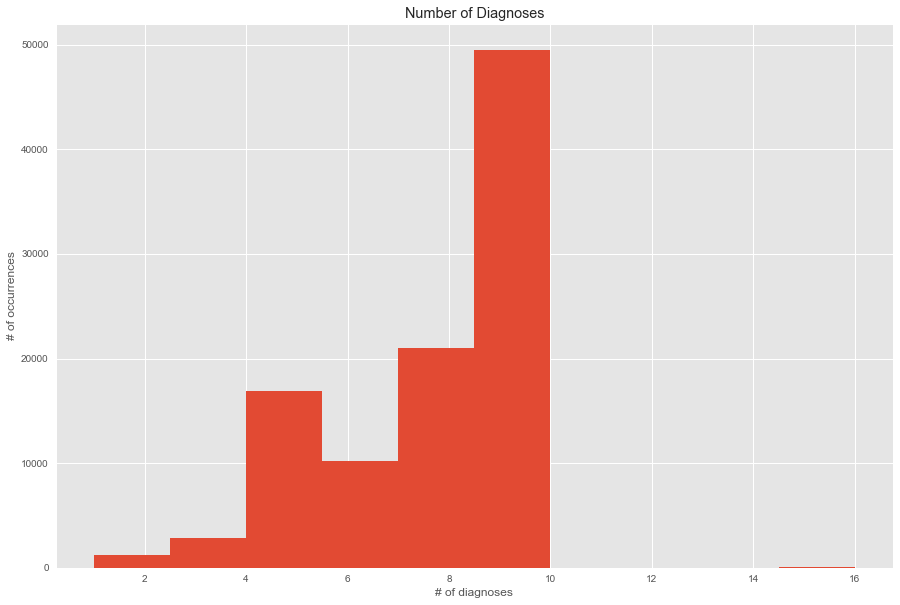

In [27]:
# Number of diagnoses
plt.hist(df['number_diagnoses'])
plt.title('Number of Diagnoses')
plt.ylabel('# of occurrences')
plt.xlabel('# of diagnoses')


In [28]:
df.groupby('readmit_bin')['number_diagnoses'].sum()/df.groupby('readmit_bin')['number_diagnoses'].count()

readmit_bin
0    7.388667
1    7.692789
Name: number_diagnoses, dtype: float64

## Drugs administered - by name##
Features at index 23 - 46 represent drugs administered.
what does the data look like?

In [29]:
df.metformin.value_counts()

No        81778
Steady    18346
Up        1067 
Down      575  
Name: metformin, dtype: int64

metformin
Down      12.000000
No        11.516545
Steady    9.713289 
Up        8.247423 
Name: readmit_bin, dtype: float64


Text(0,0.5,'% readmitted')

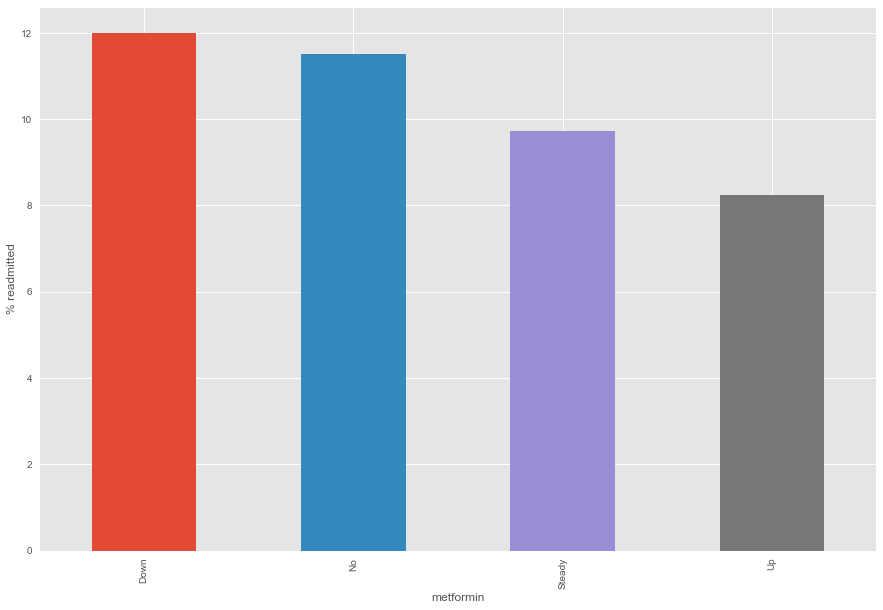

In [30]:
percent_readmit_by_drug_level = df.groupby('metformin')['readmit_bin'].sum()/df.groupby('metformin')['readmit_bin'].count() * 100
print(percent_readmit_by_drug_level)
percent_readmit_by_drug_level.plot.bar(); plt.ylabel('% readmitted')

In [31]:
colnames = df.columns.tolist()

In [32]:
drug_list = colnames[23:46]

In [33]:
for d in drug_list:
    percent_readmit_by_drug_level = df.groupby(d)['readmit_bin'].sum()/df.groupby(d)['readmit_bin'].count() * 100
    print(percent_readmit_by_drug_level)
    #percent_readmit_by_drug_level.plot.bar(); plt.ylabel('% readmitted')

metformin
Down      12.000000
No        11.516545
Steady    9.713289 
Up        8.247423 
Name: readmit_bin, dtype: float64
repaglinide
Down      6.666667 
No        11.126742
Steady    13.150289
Up        18.181818
Name: readmit_bin, dtype: float64
nateglinide
Down      9.090909 
No        11.158386
Steady    11.676647
Up        4.166667 
Name: readmit_bin, dtype: float64
chlorpropamide
Down      0.000000 
No        11.164437
Steady    6.329114 
Up        0.000000 
Name: readmit_bin, dtype: float64
glimepiride
Down      12.886598
No        11.210976
Steady    10.021413
Up        11.314985
Name: readmit_bin, dtype: float64
acetohexamide
No        11.160026
Steady    0.000000 
Name: readmit_bin, dtype: float64
glipizide
Down      15.178571
No        11.119219
Steady    11.165903
Up        12.857143
Name: readmit_bin, dtype: float64
glyburide
Down      9.219858 
No        11.221959
Steady    10.728920
Up        10.467980
Name: readmit_bin, dtype: float64
tolbutamide
No        11.161456
S

In [34]:
len(drug_list)

23

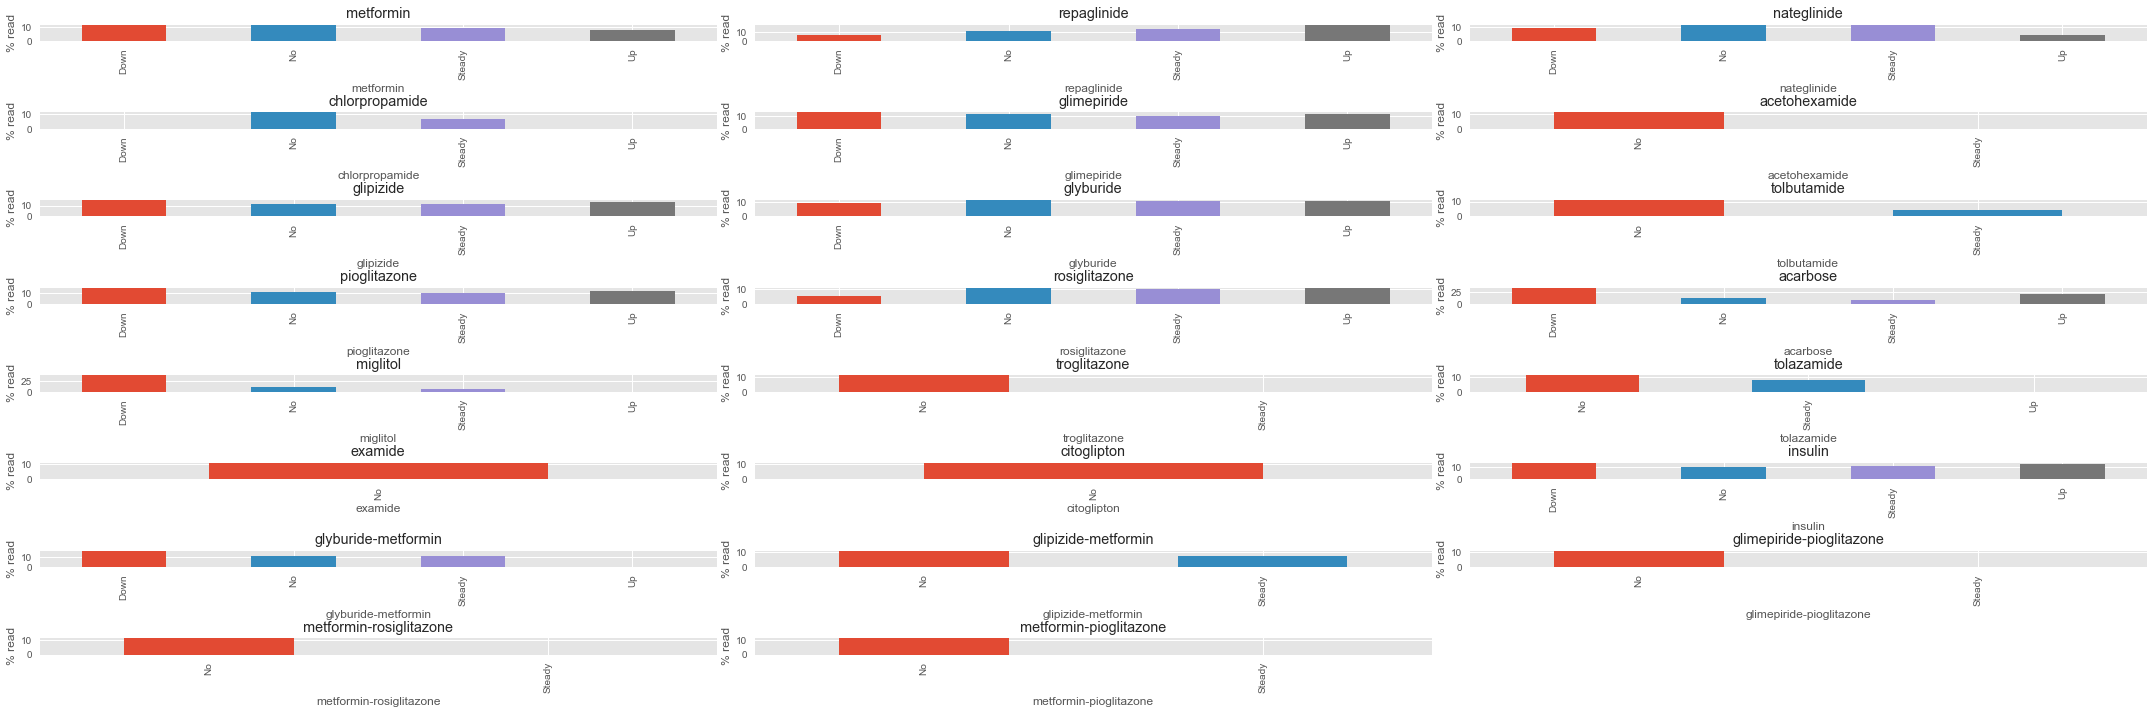

In [75]:

count = 1
for d in drug_list:
    plt.subplot(8, 3,count)
    count += 1
    percent_readmit_by_drug_level = df.groupby(d)['readmit_bin'].sum()/df.groupby(d)['readmit_bin'].count() * 100
    percent_readmit_by_drug_level.plot.bar()
    plt.ylabel('% read')
    plt.title(d)
plt.style.use('ggplot')
plt.tight_layout(pad=1, w_pad=0.5, h_pad=.1)
#plt.rcParams['figure.figsize'] = [30,10]
# Need to figure out how to display these plots better.

